In [ ]:
%cd yolov5/
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

e:\segmentation_model\yolov5


In [ ]:
#Download example image
import requests
image_url = "https://i.imgur.com/EbOBS5l.jpg"
img_data = requests.get(image_url).content
with open('zebra.jpg', 'wb') as handler:
    handler.write(img_data)

In [2]:
from PIL import Image
import IPython.display as display

In [ ]:
import cv2
img = cv2.imread("yolov5\zebra.jpg")
print(img)

None


In [ ]:
import torch

In [ ]:
#Infer using segment/predict.py
!python yolov5/segment/predict.py --weights ./weights/yolov5s-seg.pt --source yolov5\zebra.jpg


segment\predict: weights=['./weights/yolov5s-seg.pt'], source=yolov5\zebra.jpg, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-193-g485da42 Python-3.8.10 torch-1.10.0+cu113 CPU

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 E:\segmentation_model\yolov5\zebra.jpg: 448x640 1 zebra, 490.4ms
Speed: 0.0ms pre-process, 490.4ms inference, 16.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5\runs\predict-seg\exp16


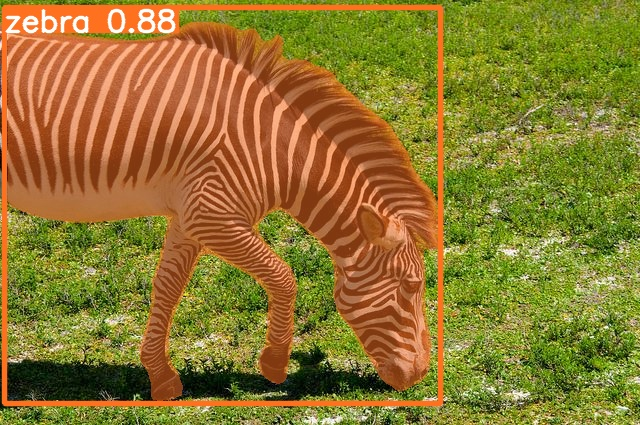

In [ ]:
display.Image(filename='yolov5\\runs\predict-seg\exp14\zebra.jpg', width=600)

In [ ]:
!pip install roboflow
!pip install python-dotenv


from roboflow import Roboflow
api_key = os.getenv("API_KEY")
rf = Roboflow(api_key=api_key)
project = rf.workspace("kamran-oftea").project("image_extraction-6dog0")
dataset = project.version(2).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Image_extraction-2 in yolov5pytorch:: 100%|██████████| 180/180 [00:00<00:00, 2506.66it/s]


In [ ]:
%cd ..

e:\segmentation_model


In [8]:
python yolov5/segment/train.py --img 320 --batch 128 --epochs 10 --data E:\segmentation_model\datasets\Image_extraction-2\data.yaml --weights yolov5s-seg.pt

SyntaxError: invalid syntax (4118512423.py, line 1)

segment\train: weights=yolov5s-seg.pt, cfg=, data=E:\segmentation_model\datasets\Image_extraction-2\data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=cpu, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-193-g485da42 Python-3.11.4 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hs

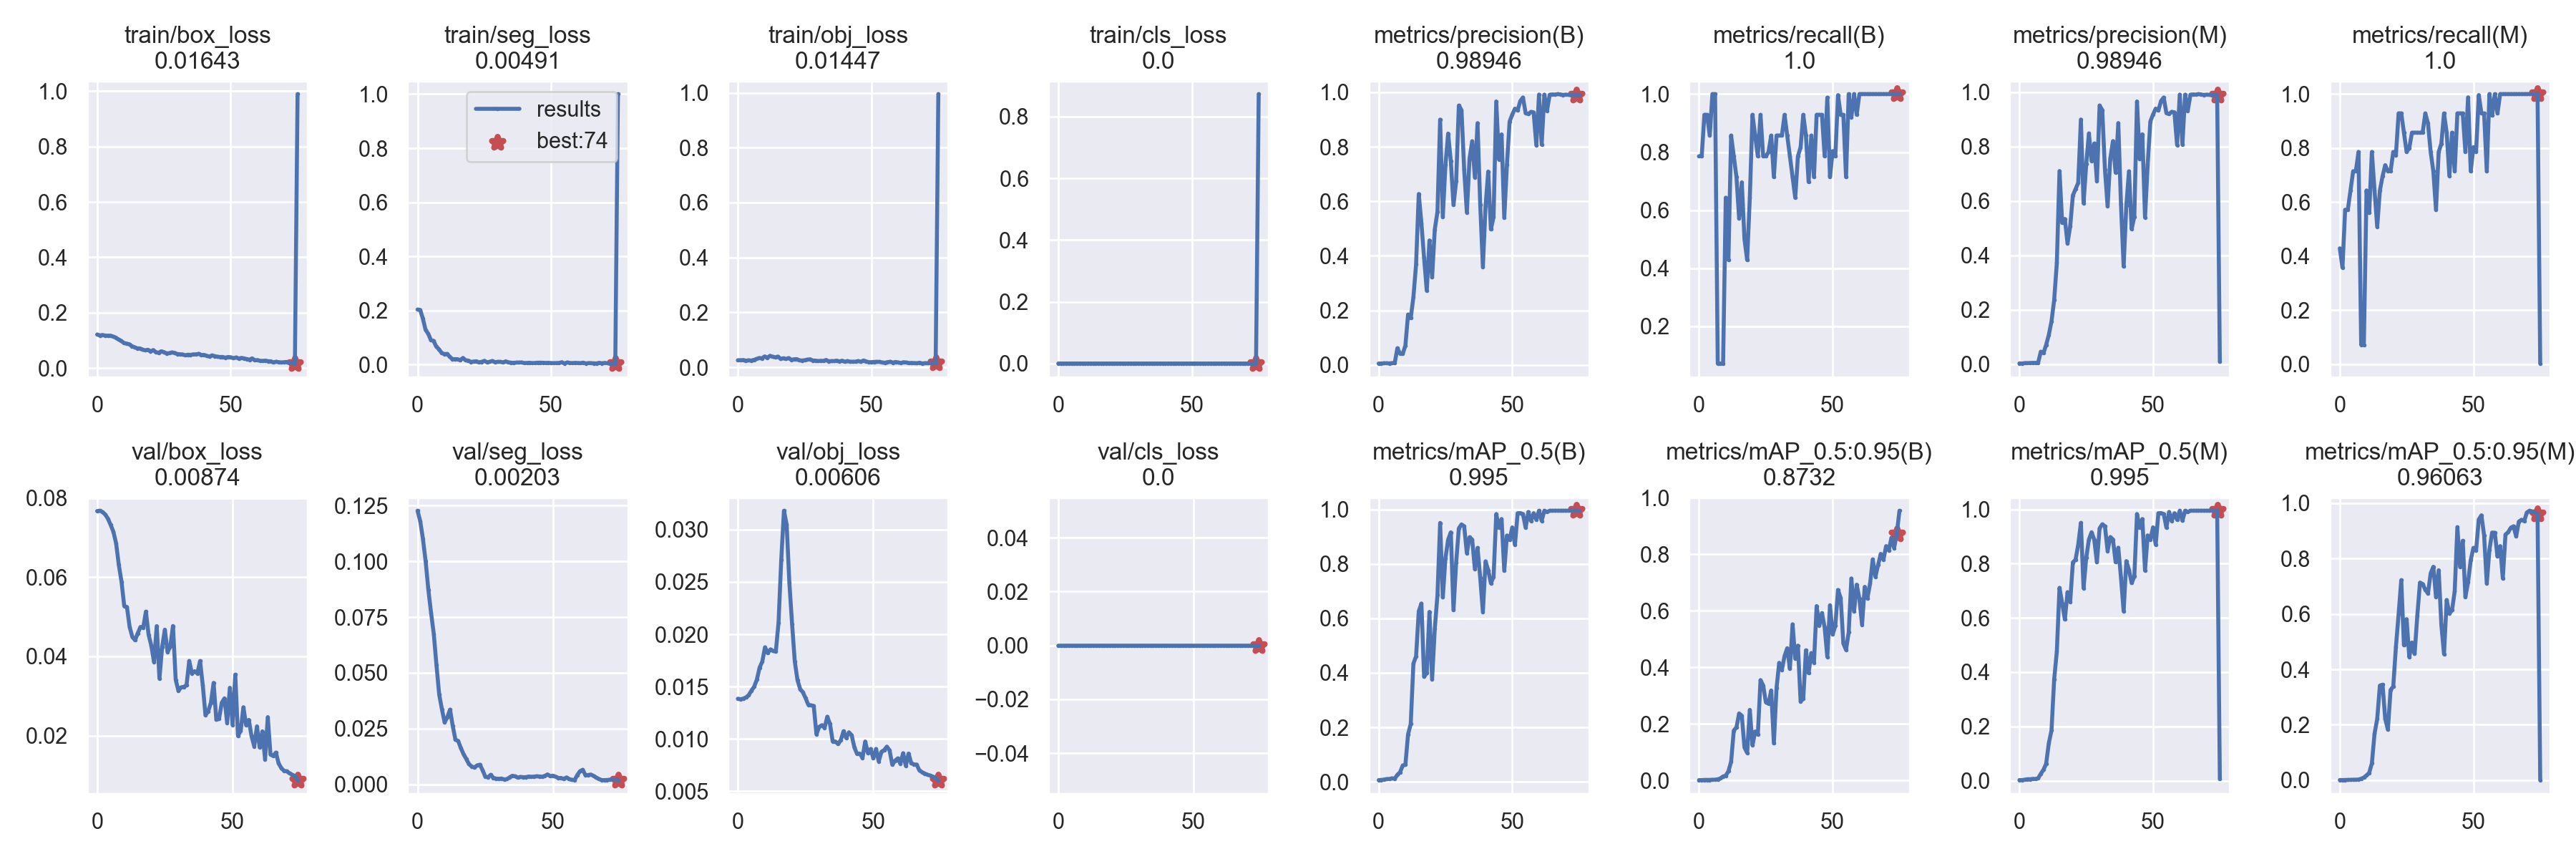

In [24]:
display.Image(filename=f'E:\segmentation_model\\yolov5\\runs\\train-seg\exp9\\results.png', width=1200)

In [9]:
!dir

 Volume in drive E is New Volume
 Volume Serial Number is C66E-DB46

 Directory of e:\segmentation_model

07/14/2023  02:57 PM    <DIR>          .
07/14/2023  05:06 AM    <DIR>          datasets
07/14/2023  03:07 PM                 0 training_logs.txt
07/14/2023  01:12 PM    <DIR>          weights
07/14/2023  01:18 PM    <DIR>          yolov5
07/14/2023  02:36 PM         4,062,133 yolov5n.pt
07/14/2023  02:35 PM        15,593,297 yolov5s-seg.pt
07/14/2023  04:54 PM           820,693 yolo_segmentation.ipynb
07/14/2023  01:17 PM                 0 zebra.jpg
               5 File(s)     20,476,123 bytes
               4 Dir(s)  233,199,230,976 bytes free


In [32]:
import os
from IPython import display

# Get the path of an image from the test or validation set
if os.path.exists(os.path.join("datasets\Image_extraction-2", "train")):
    split_path = os.path.join("datasets\Image_extraction-2", "train", "images")
else:
    split_path = os.path.join("datasets\Image_extraction-2", "valid", "images")

example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

# Infer
!python yolov5/segment/predict.py --img 320 --weights yolov5/runs/train-seg/exp9/weights/best.pt --source {example_image_path}

segment\predict: weights=['yolov5/runs/train-seg/exp9/weights/best.pt'], source=datasets\Image_extraction-2\train\images\1064-flatalaska-1-_jpg.rf.31744cddf386a606d25d416e51087ea9.jpg, data=yolov5\data\coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-193-g485da42 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 E:\segmentation_model\datasets\Image_extraction-2\train\images\1064-flatalaska-1-_jpg.rf.31744cddf386a606d25d416e51087ea9.jpg: 320x320 2 crops, 168.7ms
Speed: 0.0ms pre-process, 168.7ms inference, 0.0ms NMS per image at 

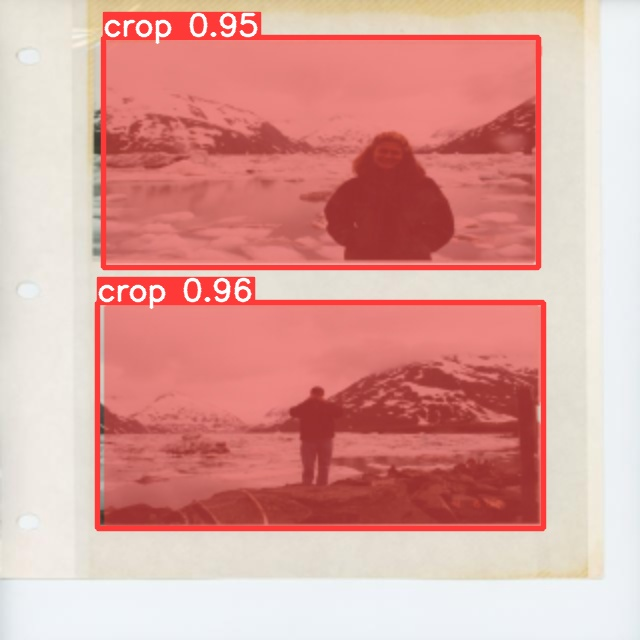

In [35]:
display.Image(filename=f'yolov5/runs/predict-seg/exp27/{example_image_name}', width=640)

In [39]:
import os
import cv2
from IPython import display

# Define the paths
if os.path.exists(os.path.join("datasets\Image_extraction-2", "train")):
    split_path = os.path.join("datasets\Image_extraction-2", "train", "images")
else:
    split_path = os.path.join("datasets\Image_extraction-2", "valid", "images")

example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

# Infer
!python yolov5/segment/predict.py --img 320 --weights yolov5/runs/train-seg/exp9/weights/best.pt --source {example_image_path}

# Path to the folder where you want to save the cropped images
output_folder = "ouput_images"

segment\predict: weights=['yolov5/runs/train-seg/exp9/weights/best.pt'], source=datasets\Image_extraction-2\train\images\1064-flatalaska-1-_jpg.rf.31744cddf386a606d25d416e51087ea9.jpg, data=yolov5\data\coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-193-g485da42 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 E:\segmentation_model\datasets\Image_extraction-2\train\images\1064-flatalaska-1-_jpg.rf.31744cddf386a606d25d416e51087ea9.jpg: 320x320 2 crops, 155.1ms
Speed: 0.0ms pre-process, 155.1ms inference, 0.0ms NMS per image at 

In [51]:
import torch 

In [55]:
import os
import torch
import cv2
from yolov5.models.experimental import attempt_load

# Specify the paths
image_path = r"E:\segmentation_model\datasets\\Image_extraction-2\\train\\images\\1064-flatalaska-1-_jpg.rf.31744cddf386a606d25d416e51087ea9.jpg"
model_weights = r"E:\segmentation_model\\yolov5\\runs\\train-seg\\exp9\weights\best.pt"
output_folder = r"E:\segmentation_model\\ouput_images"

# Load the YOLOv5 model
model = attempt_loa(model_weights, map_location=torch.device('cpu'))

# Set the model in evaluation mode
model.eval()

# Read the original image
image = cv2.imread(image_path)


NameError: name 'attempt_load' is not defined